In [1]:
import pandas as pd

In [31]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Exercise #1

Importing file and checkind file

In [84]:
df = pd.read_csv("mc-chic1.csv")

In [85]:
df.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


In [86]:
df = df.drop(df.columns[0], axis=1)

In [87]:
df.head()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


Checking the number of entries in each column and if there is null type

In [88]:
print(df.count())

ep     208984
eta    208984
p      208984
phi    208984
pol    208984
pt     208984
qp     208984
tx     208984
ty     208984
zV     208984
dtype: int64


In [89]:
print(df.isnull().sum())

ep     0
eta    0
p      0
phi    0
pol    0
pt     0
qp     0
tx     0
ty     0
zV     0
dtype: int64


Ploting the required plot

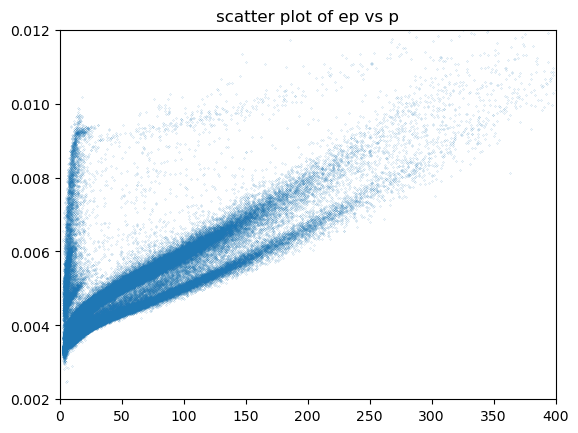

In [90]:
plt.scatter(df['p'], df['ep'],s=0.01)
plt.xlim([0, 400])
plt.ylim([0.002,0.012])
plt.title("scatter plot of ep vs p")
plt.show()

# Exercise #2 (1 point):

Ploting 1D plot of p and pt on log scale

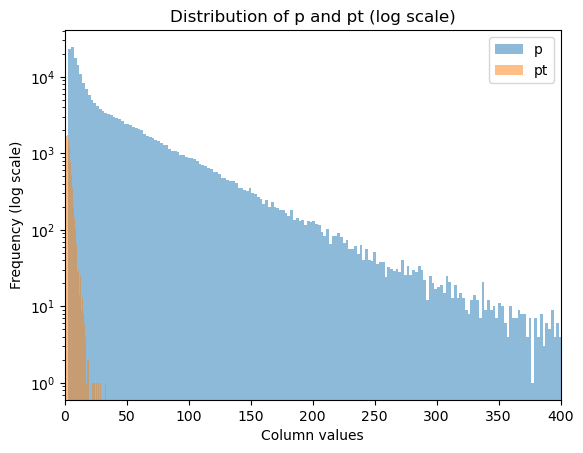

In [91]:
plt.hist(df['p'], bins=500, alpha=0.5, log=True, label='p')
plt.hist(df['pt'], bins=500, alpha=0.5, log=True, label='pt')
plt.title('Distribution of p and pt (log scale)')
plt.xlabel('Column values')
plt.ylabel('Frequency (log scale)')
plt.xlim([0, 400])
plt.legend()
plt.show()

Adding two new columns on data frame using given formula

In [92]:
def calc_sqrt(row):
    return np.sqrt(row['p'] ** 2 - row['pt'] ** 2)

# Apply the custom function to each row of the DataFrame, and store the result in a new column
df['pz'] = df.apply(calc_sqrt, axis=1)

In [93]:
def epz(row):
    return row['ep'] *(row['p']/row['pz'])

# Apply the custom function to each row of the DataFrame, and store the result in a new column
df['epz'] = df.apply(epz, axis=1)

In [94]:
df.head()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989


Ploting and verifying the results if they plot duplicates the last plot, which it should if last step is correct

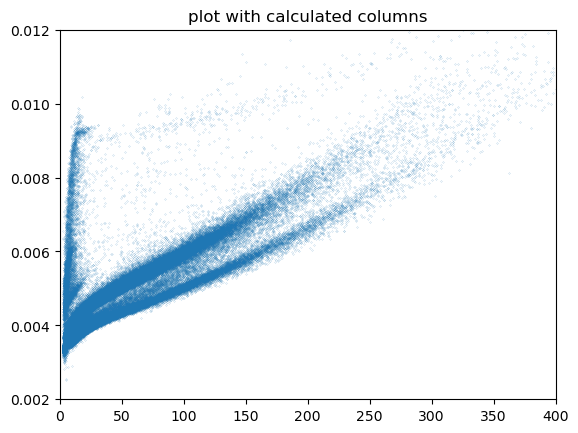

In [95]:
plt.scatter(df['pz'], df['epz'],s=0.01)
plt.xlim([0, 400])
plt.ylim([0.002,0.012])
plt.title("plot with calculated columns")
plt.show()

Removing unneccesary columns for further analysis

In [96]:
#removing unwanted columns now
X = df.drop('ep', axis = 1)
X = X.drop('pt', axis = 1)
X = X.drop('pol', axis = 1)
X = X.drop('qp', axis = 1)
X = X.drop('zV', axis = 1)
X = X.drop('pz', axis = 1)
X = X.drop('epz', axis = 1)

In [38]:
X.head()

,eta,p,phi,tx,ty
0,3.210803,72.079880,0.294754,0.077296,0.023467
1,4.436362,37.638340,-0.088796,0.023588,-0.002100
2,3.577396,18.565832,0.319936,0.053102,0.017594
3,3.532860,8.632520,0.219504,0.057089,0.012736
4,3.300828,43.359665,-0.720869,0.055445,-0.048714


In [39]:
Y = df['ep']

Here we have creted X as input variable and Y as target variable

# Exercise #3 (2 points):

In [40]:
from sklearn.metrics import r2_score

In [41]:
from tensorflow . keras . models import Sequential
from tensorflow . keras . layers import Dense
from tensorflow . keras . layers import Dropout

Defining simple neural network model

In [42]:
# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def simple_model ():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model . add ( Dense ( num_nodes , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model . add ( Dropout (0.2))
    model . add ( Dense ( num_outputs , kernel_initializer ='normal'))
    # Compile model
    model . compile ( loss ='mean_squared_error', optimizer ='adam')
    return model
    

In [43]:
simple_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [44]:
from tensorflow . keras . wrappers . scikit_learn import KerasRegressor
from sklearn . model_selection import cross_val_score
from sklearn . model_selection import KFold
from sklearn . preprocessing import StandardScaler
from sklearn . pipeline import Pipeline
import numpy as np

Traning and tracking cross validation metrics

In [51]:
N_epochs = 3
batchSize = 200

# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np . random . seed ( Answer_to_all_questions )

estimator = KerasRegressor ( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )
kfold = KFold ( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )

# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( estimator , X , Y , cv = kfold , scoring ='r2')


Epoch 1/3


C:\Users\balay\AppData\Local\Temp\ipykernel_16080\2958036644.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor ( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )


523/523 [==============================] - 1s 1ms/step - loss: 1.7186e-05
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 5.6382e-07
Epoch 3/3
523/523 [==============================] - 1s 919us/step
Epoch 1/3
523/523 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 9.5755e-07
Epoch 3/3
523/523 [==============================] - 1s 933us/step


In [52]:
print ("Standardised: %.2f %s %.2f" % ( results.mean() , u"\u00B1", results.std()))

Standardised: 0.66 ± 0.00


# Exercise #4 (3 points):

# a)

Adding pipeline method to standardize the inputs, keeping every thing same for further analysis

In [55]:
N_epochs = 3
batchSize = 200

# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np . random . seed ( Answer_to_all_questions )

estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = simple_model ,epochs = N_epochs , batch_size = batchSize ))) 

pipeline = Pipeline ( estimators )

kfold = KFold ( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )

# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , X , Y , cv = kfold , scoring ='r2')

Epoch 1/3


C:\Users\balay\AppData\Local\Temp\ipykernel_16080\2510407528.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators . append (( 'mlp', KerasRegressor ( build_fn = simple_model ,epochs = N_epochs , batch_size = batchSize )))


523/523 [==============================] - 1s 1ms/step - loss: 1.8849e-06
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 4.3683e-07
Epoch 3/3
523/523 [==============================] - 0s 879us/step
Epoch 1/3
523/523 [==============================] - 1s 1ms/step - loss: 2.9935e-06
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 4.8345e-07
Epoch 3/3
523/523 [==============================] - 0s 838us/step


In [56]:
print ("Standardised: %.2f %s %.2f" % ( results.mean() , u"\u00B1", results.std()))

Standardised: 0.71 ± 0.01


There is sligh improvement in the results as a consequence of standardisation.

# b)

Adding a new neural network layer, kepping every thing from last analysis

In [57]:

# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def dense_model ():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model . add ( Dense ( 5 , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model . add ( Dense ( 4  , kernel_initializer ='normal', \
    activation ='relu'))
    model . add ( Dropout (0.2))
    model . add ( Dense ( num_outputs , kernel_initializer ='normal'))
    # Compile model
    model . compile ( loss ='mean_squared_error', optimizer ='adam')
    return model

In [58]:
dense_model().summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 5)                 30        
                                                                 
 dense_27 (Dense)            (None, 4)                 24        
                                                                 
 dropout_13 (Dropout)        (None, 4)                 0         
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [61]:
N_epochs = 3
batchSize = 200

# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np . random . seed ( Answer_to_all_questions )

estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = dense_model ,epochs = N_epochs , batch_size = batchSize ))) 

pipeline = Pipeline ( estimators )

kfold = KFold ( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )

# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , X , Y , cv = kfold , scoring ='r2')

Epoch 1/3


C:\Users\balay\AppData\Local\Temp\ipykernel_16080\684266165.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators . append (( 'mlp', KerasRegressor ( build_fn = dense_model ,epochs = N_epochs , batch_size = batchSize )))


523/523 [==============================] - 1s 1ms/step - loss: 6.2391e-07
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 4.2549e-07
Epoch 3/3
523/523 [==============================] - 0s 838us/step
Epoch 1/3
523/523 [==============================] - 1s 1ms/step - loss: 7.1731e-07
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 4.3753e-07
Epoch 3/3
523/523 [==============================] - 1s 898us/step


In [62]:
print ("Standardised: %.2f %s %.2f" % ( results.mean() , u"\u00B1", results.std()))

Standardised: 0.71 ± 0.00


Addition of new layer doesn't seems to increse the performance.

# c)

Now replacing the extra layer with wider layer for this analysis

In [65]:
# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def wider_model ():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model . add ( Dense ( 10 , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model . add ( Dropout (0.2))
    model . add ( Dense ( num_outputs , kernel_initializer ='normal'))
    # Compile model
    model . compile ( loss ='mean_squared_error', optimizer ='adam')
    return model

In [66]:
wider_model().summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                60        
                                                                 
 dropout_19 (Dropout)        (None, 10)                0         
                                                                 
 dense_45 (Dense)            (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [67]:
N_epochs = 3
batchSize = 200

# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np . random . seed ( Answer_to_all_questions )

estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = wider_model ,epochs = N_epochs , batch_size = batchSize ))) 

pipeline = Pipeline ( estimators )

kfold = KFold ( n_splits =2 , random_state = Answer_to_all_questions , shuffle = True )

# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , X , Y , cv = kfold , scoring ='r2')

Epoch 1/3


C:\Users\balay\AppData\Local\Temp\ipykernel_16080\1477916583.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators . append (( 'mlp', KerasRegressor ( build_fn = wider_model ,epochs = N_epochs , batch_size = batchSize )))


523/523 [==============================] - 1s 1ms/step - loss: 5.3423e-06
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 4.0649e-07
Epoch 3/3
523/523 [==============================] - 1s 932us/step
Epoch 1/3
523/523 [==============================] - 1s 1ms/step - loss: 3.2713e-06
Epoch 2/3
523/523 [==============================] - 1s 1ms/step - loss: 3.9019e-07
Epoch 3/3
523/523 [==============================] - 0s 834us/step


In [68]:
print ("Standardised: %.2f %s %.2f" % ( results.mean() , u"\u00B1", results.std()))

Standardised: 0.74 ± 0.01


Wider layer increased the performance even more, so standardization and wider layer give instant performance.

# Exercise #5 :

# a)

This time I will use, standarrdization, wider and deeper network to get the best performance posssible.

In [69]:

# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def dense_model_new ():
    # create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model . add ( Dense ( 20 , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model . add ( Dense ( 30  , kernel_initializer ='normal', \
    activation ='relu'))
    model . add ( Dense ( 30  , kernel_initializer ='normal', \
    activation ='relu'))
    model . add ( Dropout (0.2))
    model . add ( Dense ( num_outputs , kernel_initializer ='normal'))
    # Compile model
    model . compile ( loss ='mean_squared_error', optimizer ='adam')
    return model

In [70]:
dense_model_new().summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 20)                120       
                                                                 
 dense_51 (Dense)            (None, 30)                630       
                                                                 
 dense_52 (Dense)            (None, 30)                930       
                                                                 
 dropout_22 (Dropout)        (None, 30)                0         
                                                                 
 dense_53 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [71]:
N_epochs = 10
batchSize = 200

# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np . random . seed ( Answer_to_all_questions )

estimators = []
estimators . append (( 'standardize', StandardScaler ()))
estimators . append (( 'mlp', KerasRegressor ( build_fn = dense_model_new ,epochs = N_epochs , batch_size = batchSize ))) 

pipeline = Pipeline ( estimators )

kfold = KFold ( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )

# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score ( pipeline , X , Y , cv = kfold , scoring ='r2')

Epoch 1/10


C:\Users\balay\AppData\Local\Temp\ipykernel_16080\1872062845.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators . append (( 'mlp', KerasRegressor ( build_fn = dense_model_new ,epochs = N_epochs , batch_size = batchSize )))


941/941 [==============================] - 2s 1ms/step - loss: 3.9394e-07
Epoch 2/10
941/941 [==============================] - 1s 1ms/step - loss: 2.8870e-07
Epoch 3/10
941/941 [==============================] - 1s 1ms/step - loss: 2.6235e-07
Epoch 4/10
941/941 [==============================] - 1s 1ms/step - loss: 2.4379e-07
Epoch 5/10
941/941 [==============================] - 1s 1ms/step - loss: 2.3335e-07
Epoch 6/10
941/941 [==============================] - 2s 2ms/step - loss: 2.3315e-07
Epoch 7/10
941/941 [==============================] - 2s 2ms/step - loss: 2.2720e-07
Epoch 8/10
941/941 [==============================] - 1s 2ms/step - loss: 2.2269e-07
Epoch 9/10
941/941 [==============================] - 1s 1ms/step - loss: 2.2085e-07
Epoch 10/10
105/105 [==============================] - 0s 1ms/step
Epoch 1/10
941/941 [==============================] - 2s 2ms/step - loss: 4.1395e-07
Epoch 2/10
941/941 [==============================] - 1s 2ms/step - loss: 2.7958e-07
Epoch 3/1

941/941 [==============================] - 2s 2ms/step - loss: 4.3153e-07
Epoch 2/10
941/941 [==============================] - 2s 2ms/step - loss: 2.7407e-07
Epoch 3/10
941/941 [==============================] - 2s 2ms/step - loss: 2.5409e-07
Epoch 4/10
941/941 [==============================] - 2s 2ms/step - loss: 2.3829e-07
Epoch 5/10
941/941 [==============================] - 2s 2ms/step - loss: 2.3413e-07
Epoch 6/10
941/941 [==============================] - 2s 2ms/step - loss: 2.3132e-07
Epoch 7/10
941/941 [==============================] - 2s 2ms/step - loss: 2.2709e-07
Epoch 8/10
941/941 [==============================] - 2s 2ms/step - loss: 2.2865e-07
Epoch 9/10
941/941 [==============================] - 2s 2ms/step - loss: 2.1907e-07
Epoch 10/10
105/105 [==============================] - 0s 1ms/step


In [72]:
print ("Standardised: %.2f %s %.2f" % ( results.mean() , u"\u00B1", results.std()))

Standardised: 0.82 ± 0.02


So, it finally achieved the benchmark set in the question.

# b)

Now ploting predicted vs actual results on graph, a idealised regression should give straight line passing through origin.

In [73]:
from sklearn . model_selection import cross_val_predict
predicted = cross_val_predict ( pipeline , X , Y , cv = kfold )

Epoch 1/10
941/941 [==============================] - 2s 1ms/step - loss: 4.1553e-07
Epoch 2/10
941/941 [==============================] - 1s 2ms/step - loss: 2.7711e-07
Epoch 3/10
941/941 [==============================] - 1s 2ms/step - loss: 2.5275e-07
Epoch 4/10
941/941 [==============================] - 1s 2ms/step - loss: 2.4158e-07
Epoch 5/10
941/941 [==============================] - 1s 2ms/step - loss: 2.3527e-07
Epoch 6/10
941/941 [==============================] - 1s 2ms/step - loss: 2.2999e-07
Epoch 7/10
941/941 [==============================] - 1s 2ms/step - loss: 2.3113e-07
Epoch 8/10
941/941 [==============================] - 1s 2ms/step - loss: 2.3005e-07
Epoch 9/10
941/941 [==============================] - 2s 2ms/step - loss: 2.2270e-07
Epoch 10/10
105/105 [==============================] - 0s 1ms/step
Epoch 1/10
941/941 [==============================] - 2s 2ms/step - loss: 3.8727e-07
Epoch 2/10
941/941 [==============================] - 1s 2ms/step - loss: 2.7689e-0

941/941 [==============================] - 2s 2ms/step - loss: 4.9165e-07
Epoch 2/10
941/941 [==============================] - 2s 2ms/step - loss: 2.9125e-07
Epoch 3/10
941/941 [==============================] - 2s 2ms/step - loss: 2.6259e-07
Epoch 4/10
941/941 [==============================] - 2s 2ms/step - loss: 2.4725e-07
Epoch 5/10
941/941 [==============================] - 2s 2ms/step - loss: 2.4010e-07
Epoch 6/10
941/941 [==============================] - 2s 2ms/step - loss: 2.3504e-07
Epoch 7/10
941/941 [==============================] - 2s 2ms/step - loss: 2.3024e-07
Epoch 8/10
941/941 [==============================] - 2s 2ms/step - loss: 2.2453e-07
Epoch 9/10
941/941 [==============================] - 2s 2ms/step - loss: 2.2433e-07
Epoch 10/10
105/105 [==============================] - 0s 1ms/step


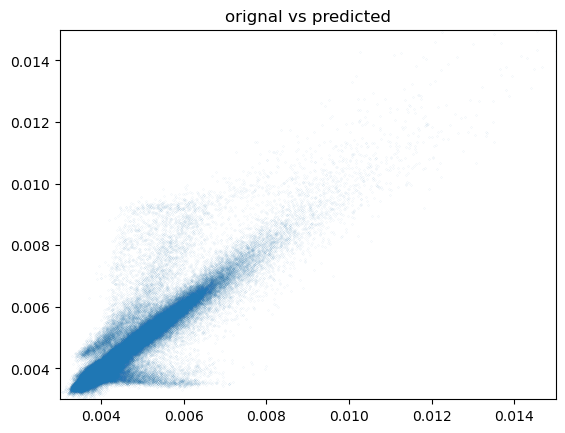

In [82]:
plt.scatter(predicted, df['ep'],s=0.001)
plt.xlim([0.003, 0.015])
plt.ylim([0.003,0.015])
plt.title('orignal vs predicted')
plt.show()

Well its not perfect, but we can see the linear relation ship.

Finally ploting predicted scatterplot and given scatter plot in first part to get the visual feel of regression.

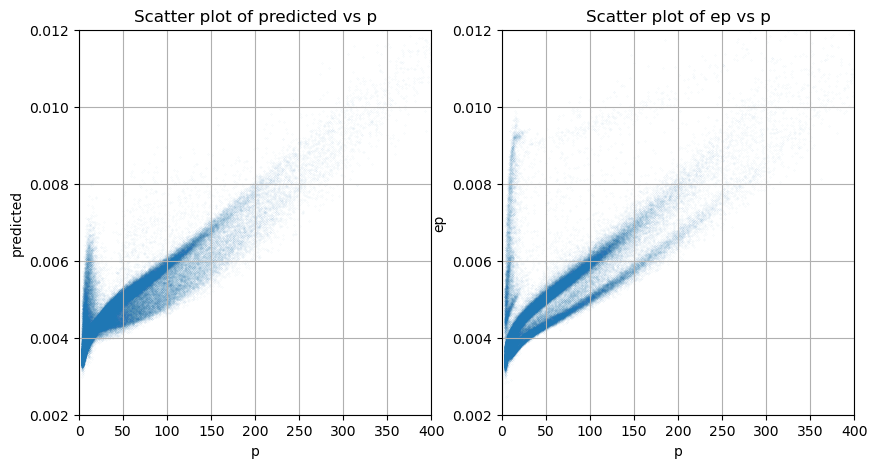

In [81]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the distribution of column 3 on a log scale
axs[0].scatter(df['p'], predicted, s=0.01, alpha=0.2)
axs[0].set_xlim([0, 400])
axs[0].set_ylim([0.002, 0.012])
axs[0].set_xlabel('p')
axs[0].set_ylabel('predicted')
axs[0].set_title('Scatter plot of predicted vs p')
axs[0].grid(True)

# Plot the distribution of column 5 on a log scale
axs[1].scatter(df['p'], df['ep'], s=0.01, alpha=0.2)
axs[1].set_xlim([0, 400])
axs[1].set_ylim([0.002, 0.012])
axs[1].set_xlabel('p')
axs[1].set_ylabel('ep')
axs[1].set_title('Scatter plot of ep vs p')
axs[1].grid(True)

# Display the plot
plt.show()

It is again not perfect, but still its remarkable results as regression has picked up these complex patterns.